In [1]:
from pandas import read_excel
import numpy as np
from numpy import concatenate
from datetime import datetime
import matplotlib.pyplot as plt
from pandas import read_csv
from matplotlib import pyplot
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from math import sqrt
from sklearn.metrics import mean_squared_error

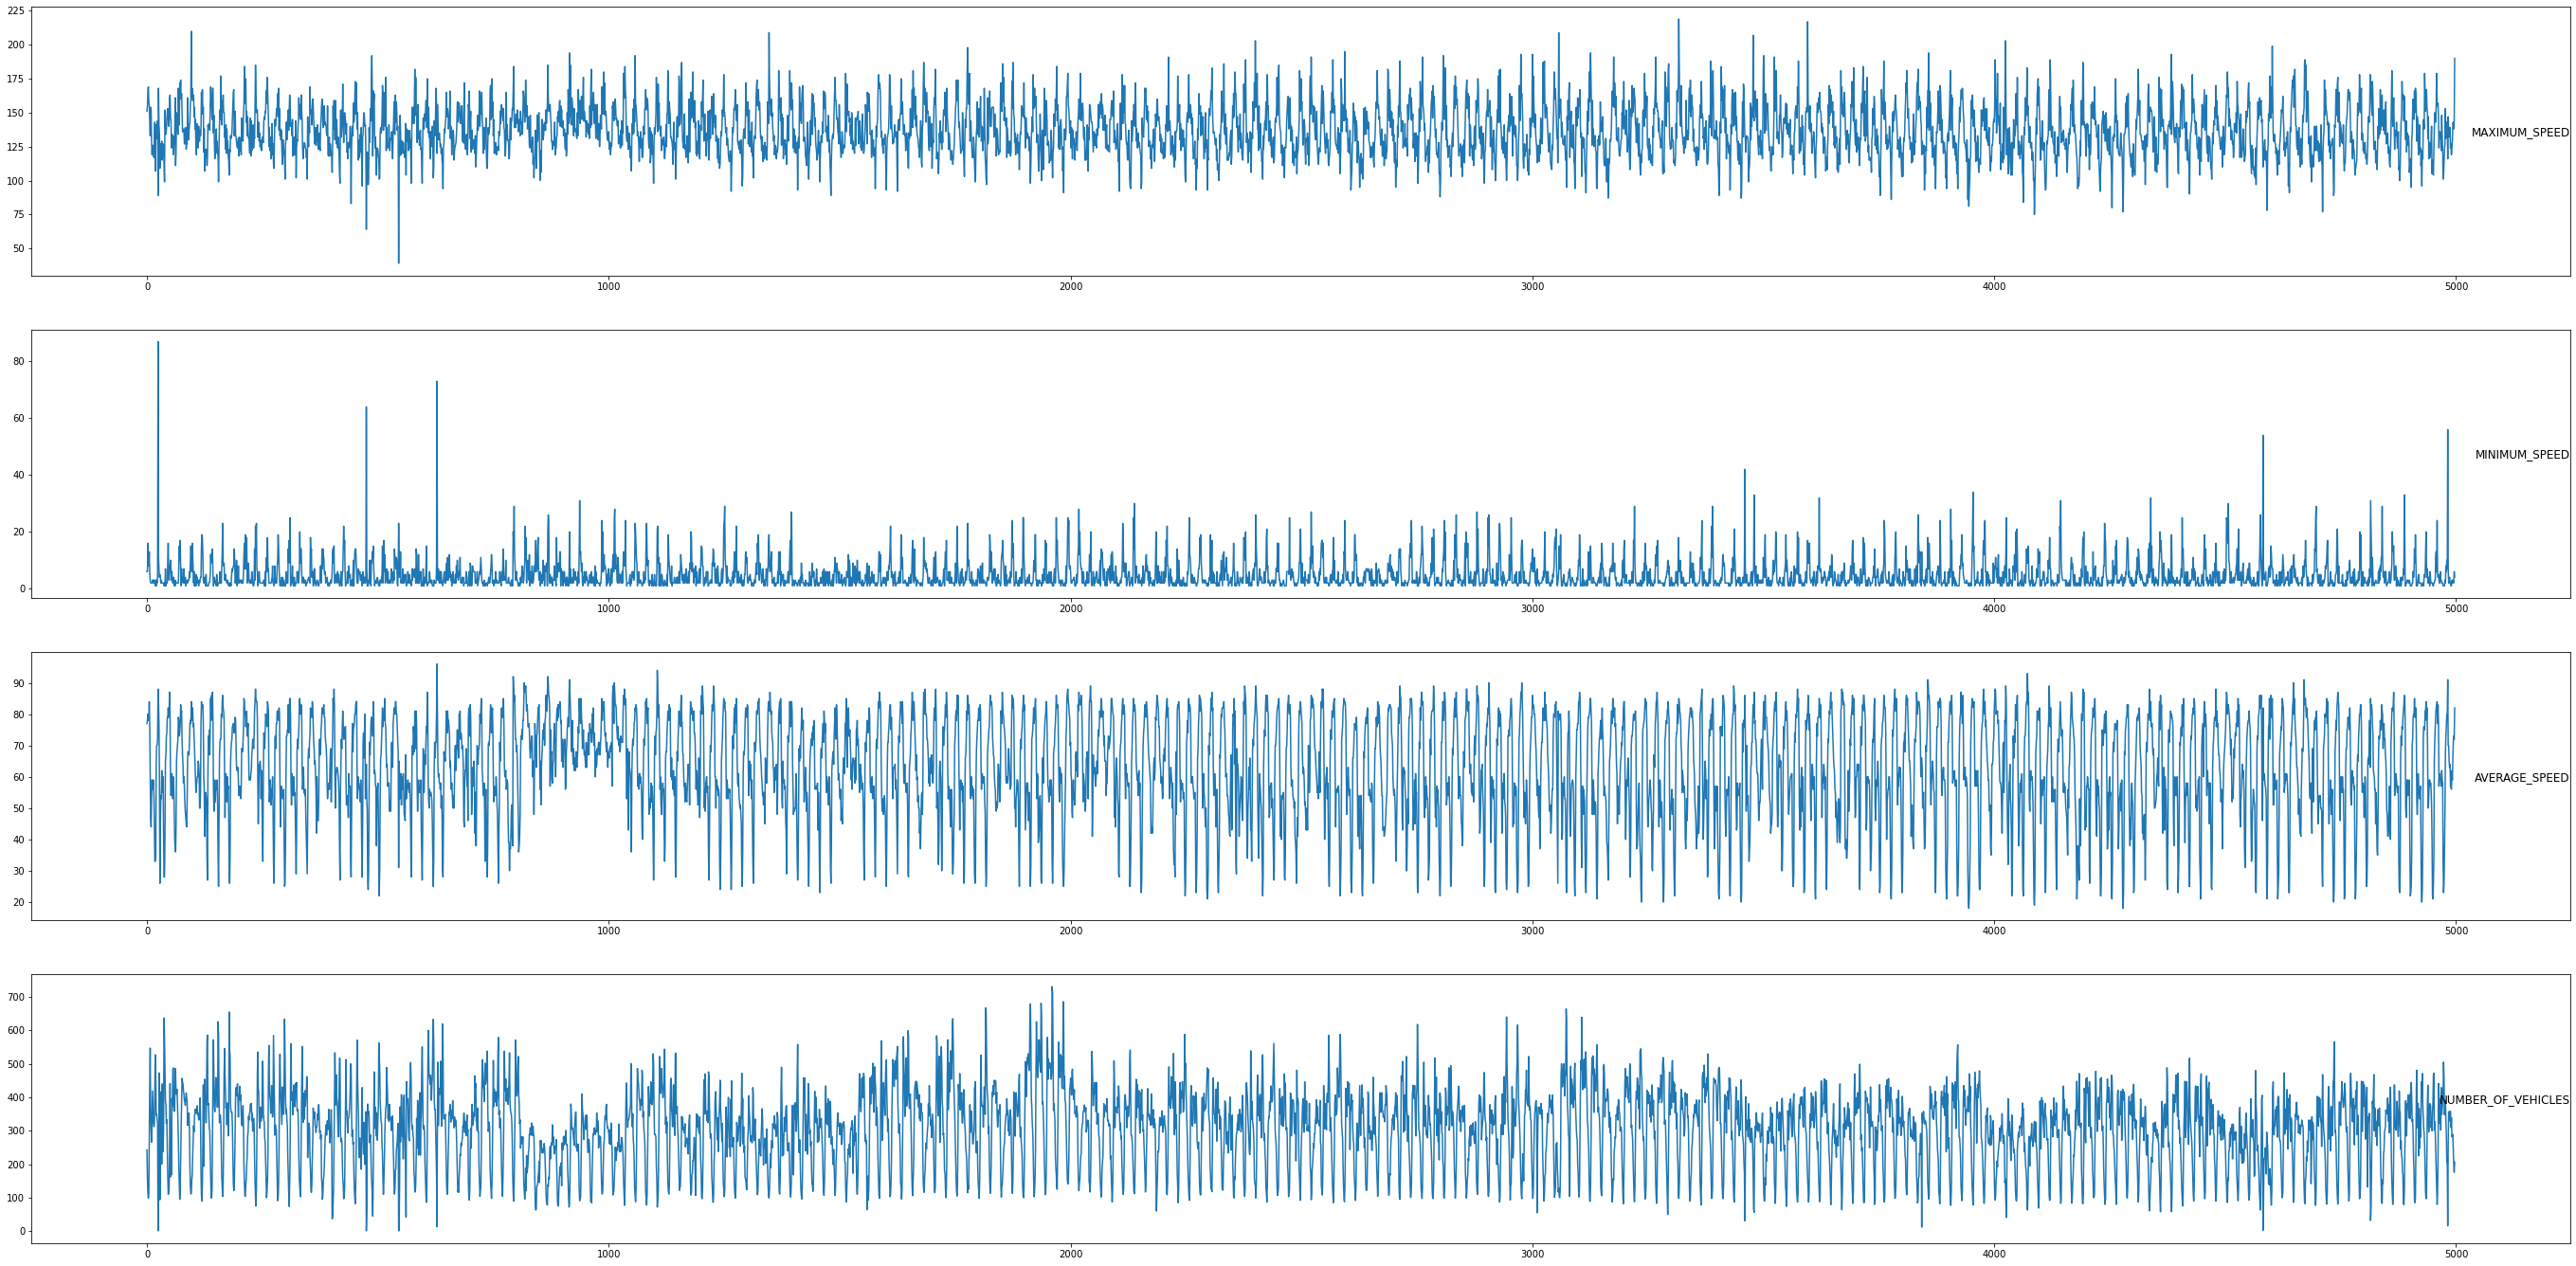

In [2]:
# load dataset
dataset = read_excel(r'C:\sxk9gd_2_6ay.xlsx', header=0, index_col=0)
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# specify columns to plot
groups = [0, 1, 2, 3]
i = 1
# plot each column
pyplot.figure(figsize=(48, 24))
for group in groups:
 pyplot.subplot(len(groups), 1, i)
 pyplot.plot(values[:, group])
 pyplot.title(dataset.columns[group], y=0.5, loc='right')
 i += 1
pyplot.show()

In [3]:
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
        n_vars = 1 if type(data) is list else data.shape[1]
        df = DataFrame(data)
        cols, names = list(), list()
        # input sequence (t-n, ... t-1)
        for i in range(n_in, 0, -1):
                cols.append(df.shift(i))
                names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
        # forecast sequence (t, t+1, ... t+n)
        for i in range(0, n_out):
                cols.append(df.shift(-i))
                if i == 0:
                        names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
                else:
                        names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
        # put it all together
        agg = concat(cols, axis=1)
        agg.columns = names
        # drop rows with NaN values
        if dropnan:
                agg.dropna(inplace=True)
        return agg

In [4]:
# specify the number of lag hours
n_hours = 6
n_steps = 3
n_features = 4
n_obs = n_hours * n_features
n_x = (n_hours * n_features) - n_steps
# frame as supervised learning
reframed = series_to_supervised(values, n_hours, n_steps)
# drop columns we don't want to predict

for i in range (0,n_steps):
   reframed.drop(reframed.columns[[n_obs+i,n_obs+i+1,n_obs+i+3]], axis=1, inplace=True) 

reframed

var1(t-6)  var2(t-6)  var3(t-6)  var4(t-6)  var1(t-5)  var2(t-5)  \
6         151.0        6.0       77.0      243.0      155.0        6.0   
7         155.0        6.0       78.0      159.0      166.0       16.0   
8         166.0       16.0       80.0      112.0      169.0        9.0   
9         169.0        9.0       78.0       99.0      158.0        8.0   
10        158.0        8.0       78.0      113.0      155.0       13.0   
...         ...        ...        ...        ...        ...        ...   
4991      133.0        3.0       65.0      331.0      132.0        4.0   
4992      132.0        4.0       63.0      330.0      139.0        2.0   
4993      139.0        2.0       64.0      359.0      124.0        2.0   
4994      124.0        2.0       57.0      357.0      127.0        1.0   
4995      127.0        1.0       57.0      310.0      119.0        1.0   

      var3(t-5)  var4(t-5)  var1(t-4)  var2(t-4)  ...  var2(t-2)  var3(t-2)  \
6          78.0      159.0      166.0       16.0  ...        8.0       78.0   
7          80.0      112.0      169.0        9.0  ...       13.0       84.0   
8          78.0       99.0      158.0        8.0  ...        5.0       76.0   
9          78.0      113.0      155.0       13.0  ...        3.0       61.0   
10         84.0      282.0      144.0        5.0  ...        2.0       47.0   
...         ...        ...        ...        ...  ...        ...        ...   
4991       63.0      330.0      139.0        2.0  ...        1.0       57.0   
4992       64.0      359.0      124.0        2.0  ...        1.0       56.0   
4993       57.0      357.0      127.0        1.0  ...        3.0       62.0   
4994       57.0      310.0      119.0        1.0  ...        2.0       59.0   
4995       56.0      339.0      124.0        3.0  ...        3.0       65.0   

      var4(t-2)  var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var3(t)  \
6         113.0      155.0       13.0       84.0      282.0     76.0   
7         282.0      144.0        5.0       76.0      434.0     61.0   
8         434.0      133.0        3.0       61.0      547.0     47.0   
9         547.0      154.0        2.0       47.0      348.0     44.0   
10        348.0      152.0        2.0       44.0      301.0     54.0   
...         ...        ...        ...        ...        ...      ...   
4991      310.0      119.0        1.0       56.0      339.0     62.0   
4992      339.0      124.0        3.0       62.0      282.0     59.0   
4993      282.0      129.0        2.0       59.0      285.0     65.0   
4994      285.0      142.0        3.0       65.0      289.0     71.0   
4995      289.0      143.0        2.0       71.0      243.0     73.0   

      var3(t+1)  var3(t+2)  
6          61.0       47.0  
7          47.0       44.0  
8          44.0       54.0  
9          54.0       59.0  
10         59.0       56.0  
...         ...        ...  
4991       59.0       65.0  
4992       65.0       71.0  
4993       71.0       73.0  
4994       73.0       72.0  
4995       72.0       82.0  

[4990 rows x 27 columns]

In [5]:
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
reframed = scaler.fit_transform(reframed)

In [6]:
# split into train and test sets
# %60 Train % 40 Test
TRAIN_SIZE = 0.60
train = reframed[:int(len(reframed)*TRAIN_SIZE), :]
test = reframed[int(len(reframed)*TRAIN_SIZE):, :]

# split into input and outputs
train_X, train_y = train[:, :n_obs], train[:, -n_steps:]
test_X, test_y = test[:, :n_obs], test[:, -n_steps:]
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape, len(test_X))

(2994, 24) (2994, 3) (1996, 24) (1996, 3) 1996


In [7]:
def sigmoid_act(x, der=False):
   import numpy as np

   if (der == True):  # Turev sigmoid
      f = 1 / (1 + np.exp(- 0.25*x)) * (1 - 1 / (1 + np.exp(- 0.25*x)))
   else:  # sigmoid
      f = 1 / (1 + np.exp(- 0.25*x))

   return f


def tanh_act(x, der=False):
   import numpy as np

   if (der == True):  # Turev tanh
      f = 1 - np.square(((np.exp(x)) - (np.exp(-x))) / ((np.exp(x)) + (np.exp(-x))))
   else:
      f = ((np.exp(x)) - (np.exp(-x))) / ((np.exp(x)) + (np.exp(-x)))

   return f

def Lineer_act(x, der=False):
   import numpy as np

   if (der == True):  # the derivative of the ReLU is the Heaviside Theta
      f = 1
   else:
      f = x

   return f



In [8]:
p = 30  # Gizli Katman 1 neron sayisi
q = 20  # Gizli Katman 2 neron sayisi
r = n_steps    # Cikis Katmani neron sayisi

eta = 1 / 100        # Learning rate
alpha = 1 / 300      # Momentum

w10 = np.zeros((p, np.size(train_X, 1)))       # (k-1) 1. Katman Agirlik Degerleri - momentum icin.
w11 = 0.25 * np.random.randn(p, np.size(train_X, 1))  # 1. Katman Agirlik Degerleri
b1 = 0.25 * np.random.randn(p)

w20 = np.zeros((q, p))                          # (k-1) 2. Katman Agirlik Degerleri - momentum icin.
w21 = 0.25 * np.random.randn(q, p)              # 2. Katman Agirlik Degerleri
b2 = 0.25 * np.random.randn(q)

wOut0 = np.zeros((r, q))                        # (k-1) Cikis Katmani Agirlik Degerleri - momentum icin.
wOut1 = 0.25 * np.random.randn(r, q)            # Cikis Katmani Agirlik Degerleri
bOut = 0.25 * np.random.randn(r)

act_1 = tanh_act
act_2 = Lineer_act

E_ani_max = []
E_ort = []
epoch = 1000  # Iterasyon Sayisi

l= 999


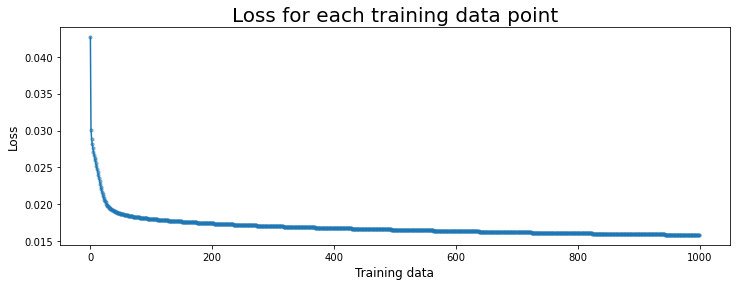

In [9]:
for l in range(epoch):
   E_ani = []
   
   for k in range(np.size(train_X, 0)):
     
      # 1: Egitim Veri Seti Girisi
      
      x = train_X[k]
      
      # 2: Feed forward
      w1 = w11
      v1 = np.dot(w1, x) + b1
      yl1 = act_1(v1)      
      w2 = w21
      v2 = np.dot(w2, yl1) + b2
      yl2 = act_2(v2)  # 2. Katman Cikisi     y2: Gercek cikis olduğundan farklı olsun diye yl2 yazildi.
      
      wOut = wOut1
      v_o = np.dot(wOut, yl2) + bOut
      y = Lineer_act(v_o)  # Cikis Katmani Cikisi

      # 2.2: Cikis Katmani Yerel Gradyen
      delta_Out = (train_y[k] - y) * Lineer_act(v_o, der=True)

      # 2.3: Backpropagate
      delta_2 = np.dot(delta_Out, wOut) * act_2(v2, der=True)  # 2. Katman Yerel Gradyen
      delta_1 = np.dot(delta_2, w2) * act_1(v1, der=True)      # 1. Katman Yerel Gradyen

      # 3: Gradient descent
      wOut = wOut1 + eta * np.outer(delta_Out, yl2) + alpha * (wOut1 - wOut0)  # Cikis Katmani Agirlik güncelleme
      wOut0 = wOut1
      wOut1 = wOut
      bOut = bOut + eta * delta_Out

      w2 = w21 + eta * np.outer(delta_2, yl1) + alpha * (w21 - w20)  # Gizli Katman 2 Agirlik güncelleme
      w20 = w21
      w21 = w2
      b2 = b2 + eta * delta_2

      w1 = w11 + eta * np.outer(delta_1, x) + alpha * (w11 - w10)  # Gizli Katman 1 Agirlik güncelleme
      w10 = w11
      w11 = w1
      b1 = b1 + eta * delta_1

      e = train_y[k] - y
      
      # 4. loss function Hesaplama

      E_ani.append((1 / 2) * np.dot(e.T, e))

   E_ort.append((1 / np.size(train_X, 0)) * sum(E_ani))
   E_ani_max.append(max(E_ani))

   if l >= 21:
      if abs((E_ort[l - 1]) - (E_ort[l])) <= 0.0000000001 or (E_ort[l - 20]) - (E_ort[l]) <  -0.0005:
         print("E_ort_degisim=",(E_ort[l - 20]) - (E_ort[l]))
         break
print("l=",l)

      
      # 5. Her Iterasyon icin hatayi cizdiriyoruz

plt.figure(figsize=(12, 4))
plt.scatter(np.arange(0, l + 1), E_ort, alpha=0.5, s=10, label='Error')
plt.plot(E_ort)
plt.title('Loss for each training data point', fontsize=20)
plt.xlabel('Training data', fontsize=12)
plt.ylabel('Loss', fontsize=12)
#plt.legend()
plt.show()


In [10]:
pred_train_y = []                   # Ag Cikisi Degerleri (k)
E_ani_tr = []
E_ort_tr = []

# 7. Test Veri Seti Girisi


for n in range(np.size(train_X, 0)):
    x_tr = train_X[n]

    v1_tr = np.dot(w1, x_tr) + b1
    y1_tr = act_1(v1_tr)  # 1. Katman Cikisi

    v2_tr = np.dot(w2, y1_tr) + b2
    y2_tr = act_2(v2_tr)  # 2. Katman Cikisi

    v_otr = np.dot(wOut, y2_tr) + bOut
    y_tr = Lineer_act(v_otr)  # Cikis Katmani Cikisi
    e_tr = train_y[n] - y_tr
    pred_train_y.append(y_tr)


In [11]:
pred_test_y = []                   # Ag Cikisi Degerleri (k)
E_ani_t = []
E_ort_t = []

# 7. Test Veri Seti Girisi


for m in range(np.size(test_X, 0)):
    x_t = test_X[m]

    v1_t = np.dot(w1, x_t) + b1
    y1_t = act_1(v1_t)  # 1. Katman Cikisi

    v2_t = np.dot(w2, y1_t) + b2
    y2_t = act_2(v2_t)  # 2. Katman Cikisi

    v_ot = np.dot(wOut, y2_t) + bOut
    y_t = Lineer_act(v_ot)  # Cikis Katmani Cikisi
    e_t = test_y[m] - y_t
    pred_test_y.append(y_t)


In [12]:
  # Şimdi tahminleri 0-1 ile scale edilmiş halinden geri çeviriyoruz.
#pred_train_Y = np.array(pred_train_y)
pred_train_y = concatenate((train_X[:, -n_obs:], pred_train_y), axis=1)
pred_train_y = scaler.inverse_transform(pred_train_y)
pred_train_y = pred_train_y[:,-n_steps:]

# invert scaling for actual
#train_y = train_y.reshape((len(train_y), n_steps))
train_y = concatenate((train_X[:, -n_obs:], train_y), axis=1)
train_y = scaler.inverse_transform(train_y)
train_y = train_y[:,-n_steps:]

In [13]:
# invert scaling for forecast
pred_test_y = concatenate(( test_X[:, -n_obs:], pred_test_y), axis=1)
pred_test_y = scaler.inverse_transform(pred_test_y)
pred_test_y = pred_test_y[:,-n_steps:]
# invert scaling for actual
#test_y = test_y.reshape((len(test_y), n_steps))
test_y = concatenate((test_X[:, -n_obs:], test_y), axis=1)
test_y = scaler.inverse_transform(test_y)
test_y = test_y[:,-n_steps:]

In [14]:
# calculate RMSE
rmse_train = sqrt(mean_squared_error(train_y, pred_train_y))
print("Train data score: %.2f RMSE" % rmse_train)

rmse_test = sqrt(mean_squared_error(test_y, pred_test_y))
print("Test data score: %.2f RMSE" % rmse_test)

Train data score: 10.26 RMSE
Test data score: 10.05 RMSE


In [15]:
from sklearn.metrics import mean_absolute_percentage_error

error_mape_tr = 100*mean_absolute_percentage_error(train_y, pred_train_y)
print("Train data score: %.2f MAPE" % error_mape_tr)

error_mape_t = 100*mean_absolute_percentage_error(test_y, pred_test_y)
print("Test data score: %.2f MAPE" % error_mape_t)
error_mape_t0 = 100*mean_absolute_percentage_error(test_y[:,0], pred_test_y[:,0])
print("Test t zamanı score: %.2f MAPE" % error_mape_t0)
error_mape_t1 = 100*mean_absolute_percentage_error(test_y[:,1], pred_test_y[:,1])
print("Test t+1 zamanı score: %.2f MAPE" % error_mape_t1)
error_mape_t2 = 100*mean_absolute_percentage_error(test_y[:,2], pred_test_y[:,2])
print("Test t+2 zamanı score: %.2f MAPE" % error_mape_t2)

Train data score: 13.35 MAPE
Test data score: 14.84 MAPE
Test t zamanı score: 10.80 MAPE
Test t+1 zamanı score: 15.82 MAPE
Test t+2 zamanı score: 17.90 MAPE


In [16]:
mdape_tr = np.median((np.abs(np.subtract(train_y, pred_train_y)/ train_y))) * 100
print("Train data score: %.2f MdAPE" % mdape_tr)

mdape_t = np.median((np.abs(np.subtract(test_y, pred_test_y)/ test_y))) * 100
print("Test data score: %.2f MdAPE" % mdape_t)

Train data score: 10.06 MdAPE
Test data score: 9.80 MdAPE


In [17]:
def smape(A, F):
    return 100/len(A) * np.sum(2 * np.abs(F - A) / (np.abs(A) + np.abs(F)))

error_smape_tr = smape(train_y, pred_train_y)
print("Train data score: %.2f SMAPE" % error_smape_tr)

error_smape_t = smape(test_y, pred_test_y)
print("Test data score: %.2f SMAPE" % np.mean(error_smape_t))

Train data score: 41.94 SMAPE
Test data score: 42.49 SMAPE


In [18]:
from sklearn.metrics import mean_absolute_error
e_tr = train_y - pred_train_y
scale = mean_absolute_error(train_y[1:], train_y[:-1])
mase_tr = np.mean(np.abs(e_tr / scale))
print("Train data score: %.2f MASE" % mase_tr)

e_t = test_y - pred_test_y
scale = mean_absolute_error(test_y[1:], test_y[:-1])
mase_t = np.mean(np.abs(e_t / scale))
print("Test data score: %.2f MASE" % mase_t)

Train data score: 1.25 MASE
Test data score: 1.10 MASE


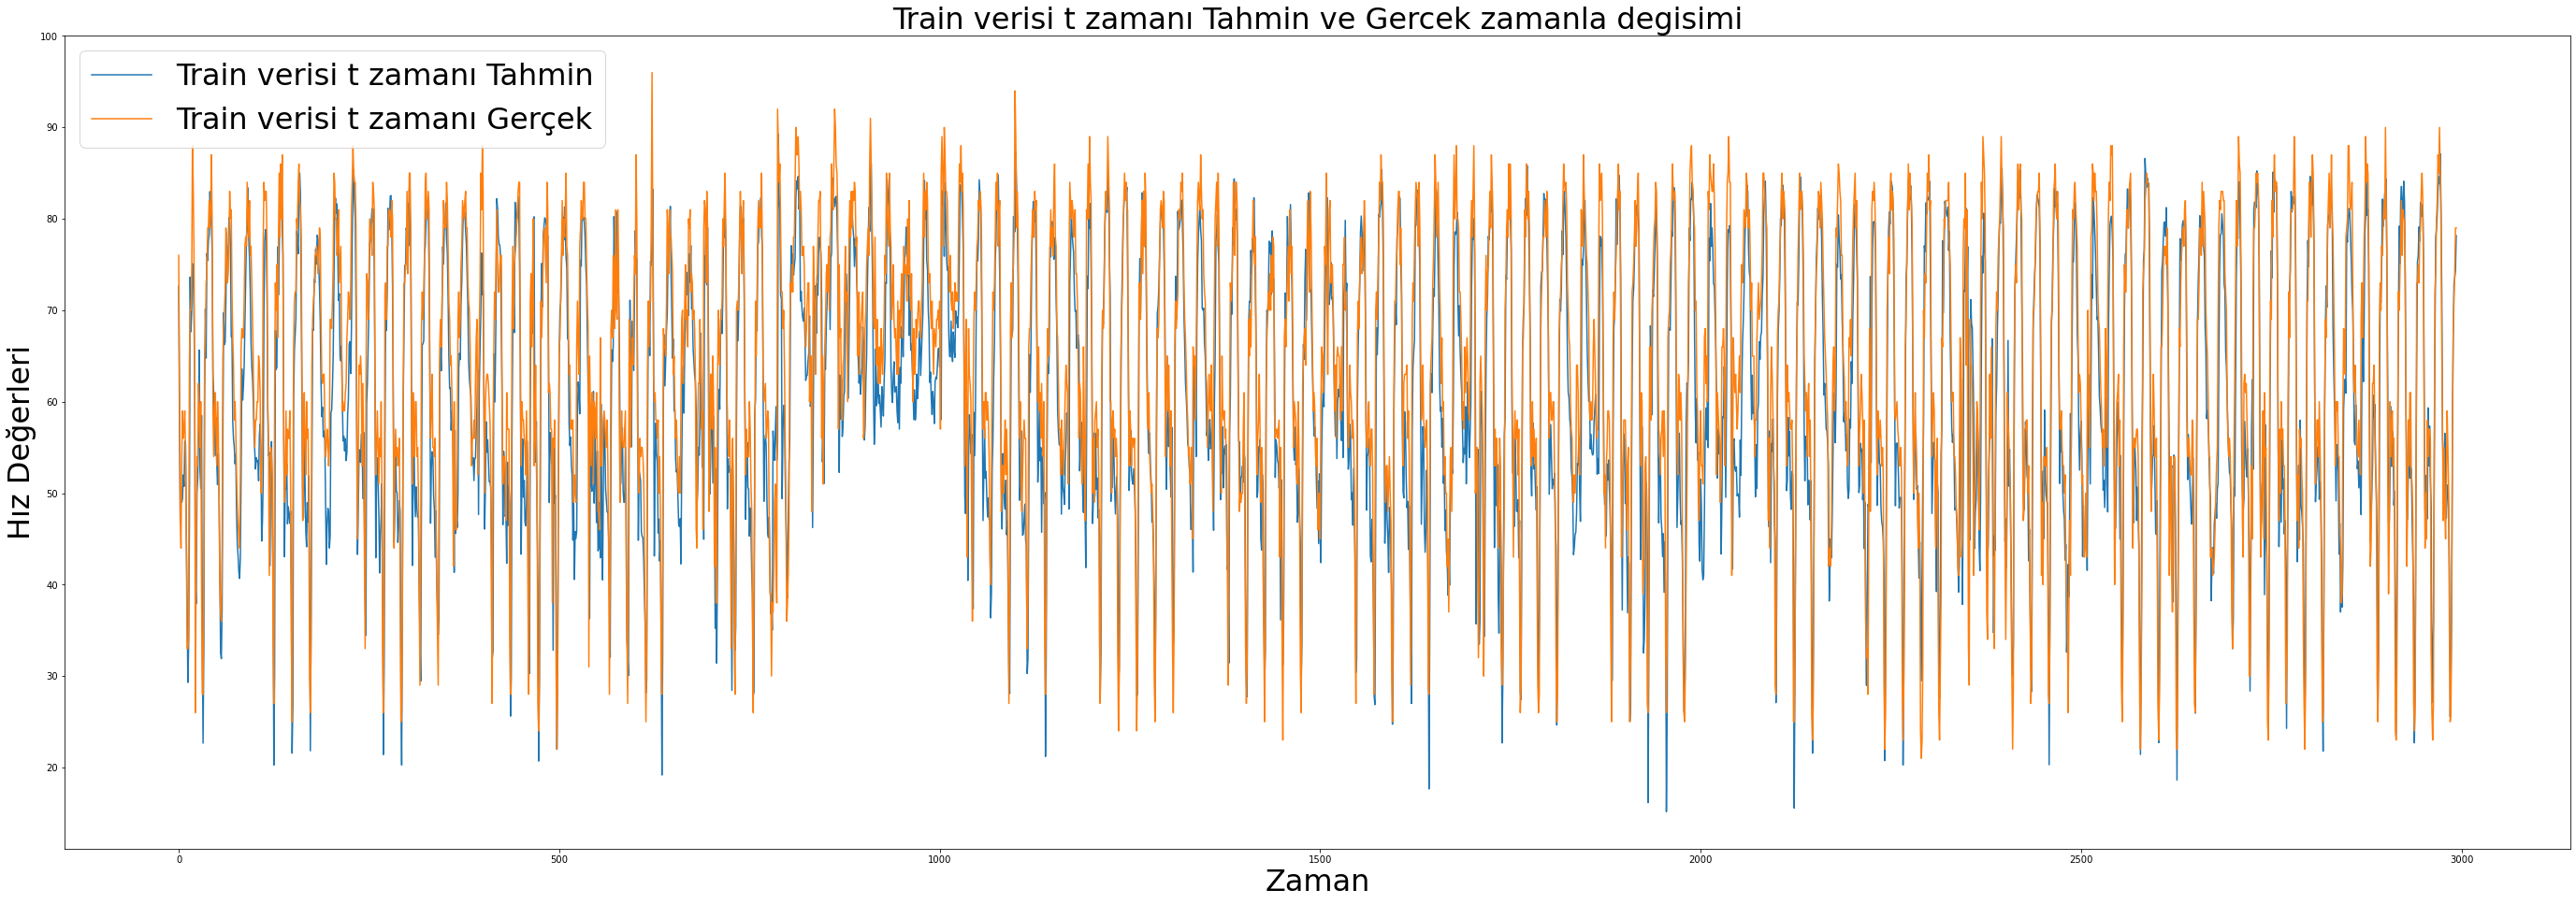

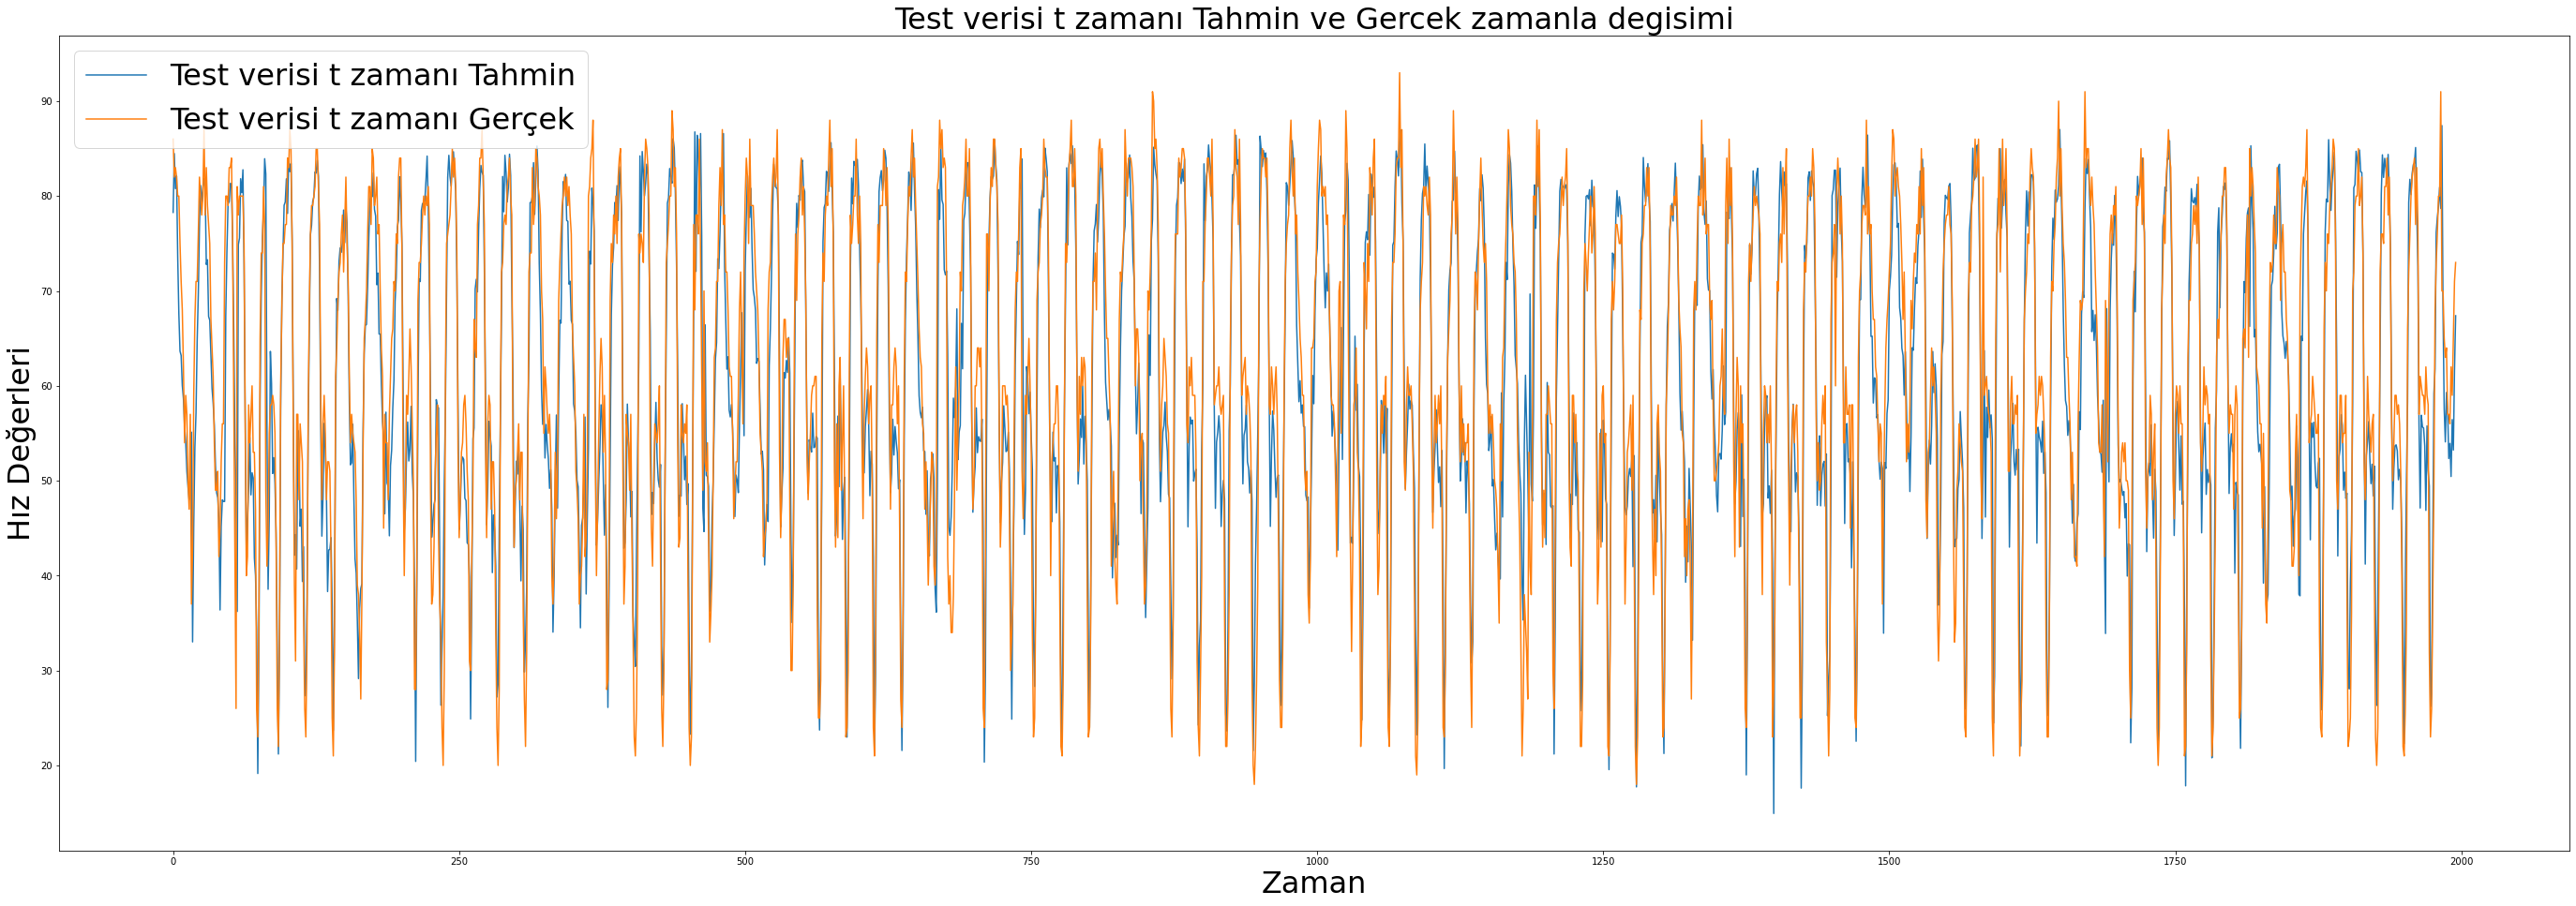

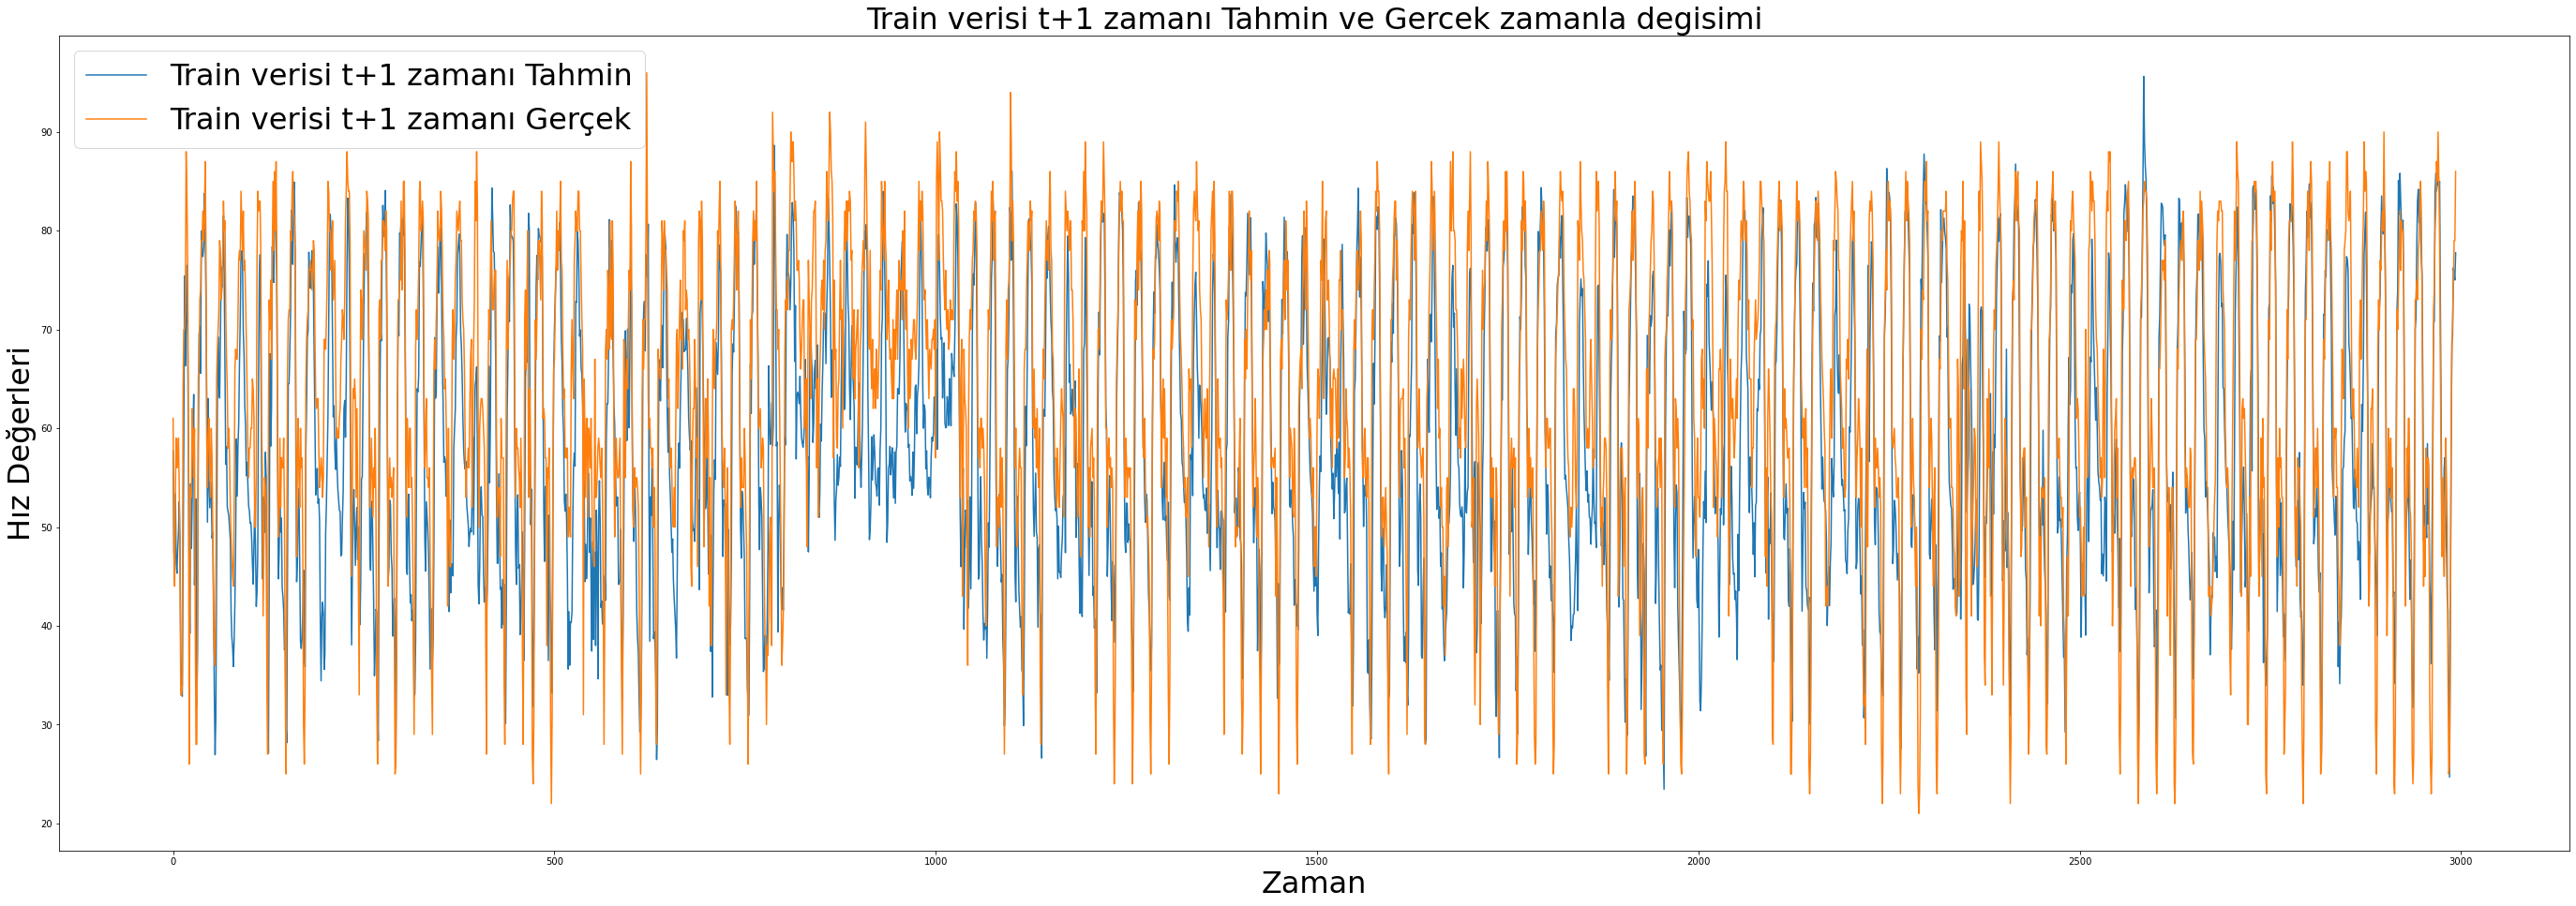

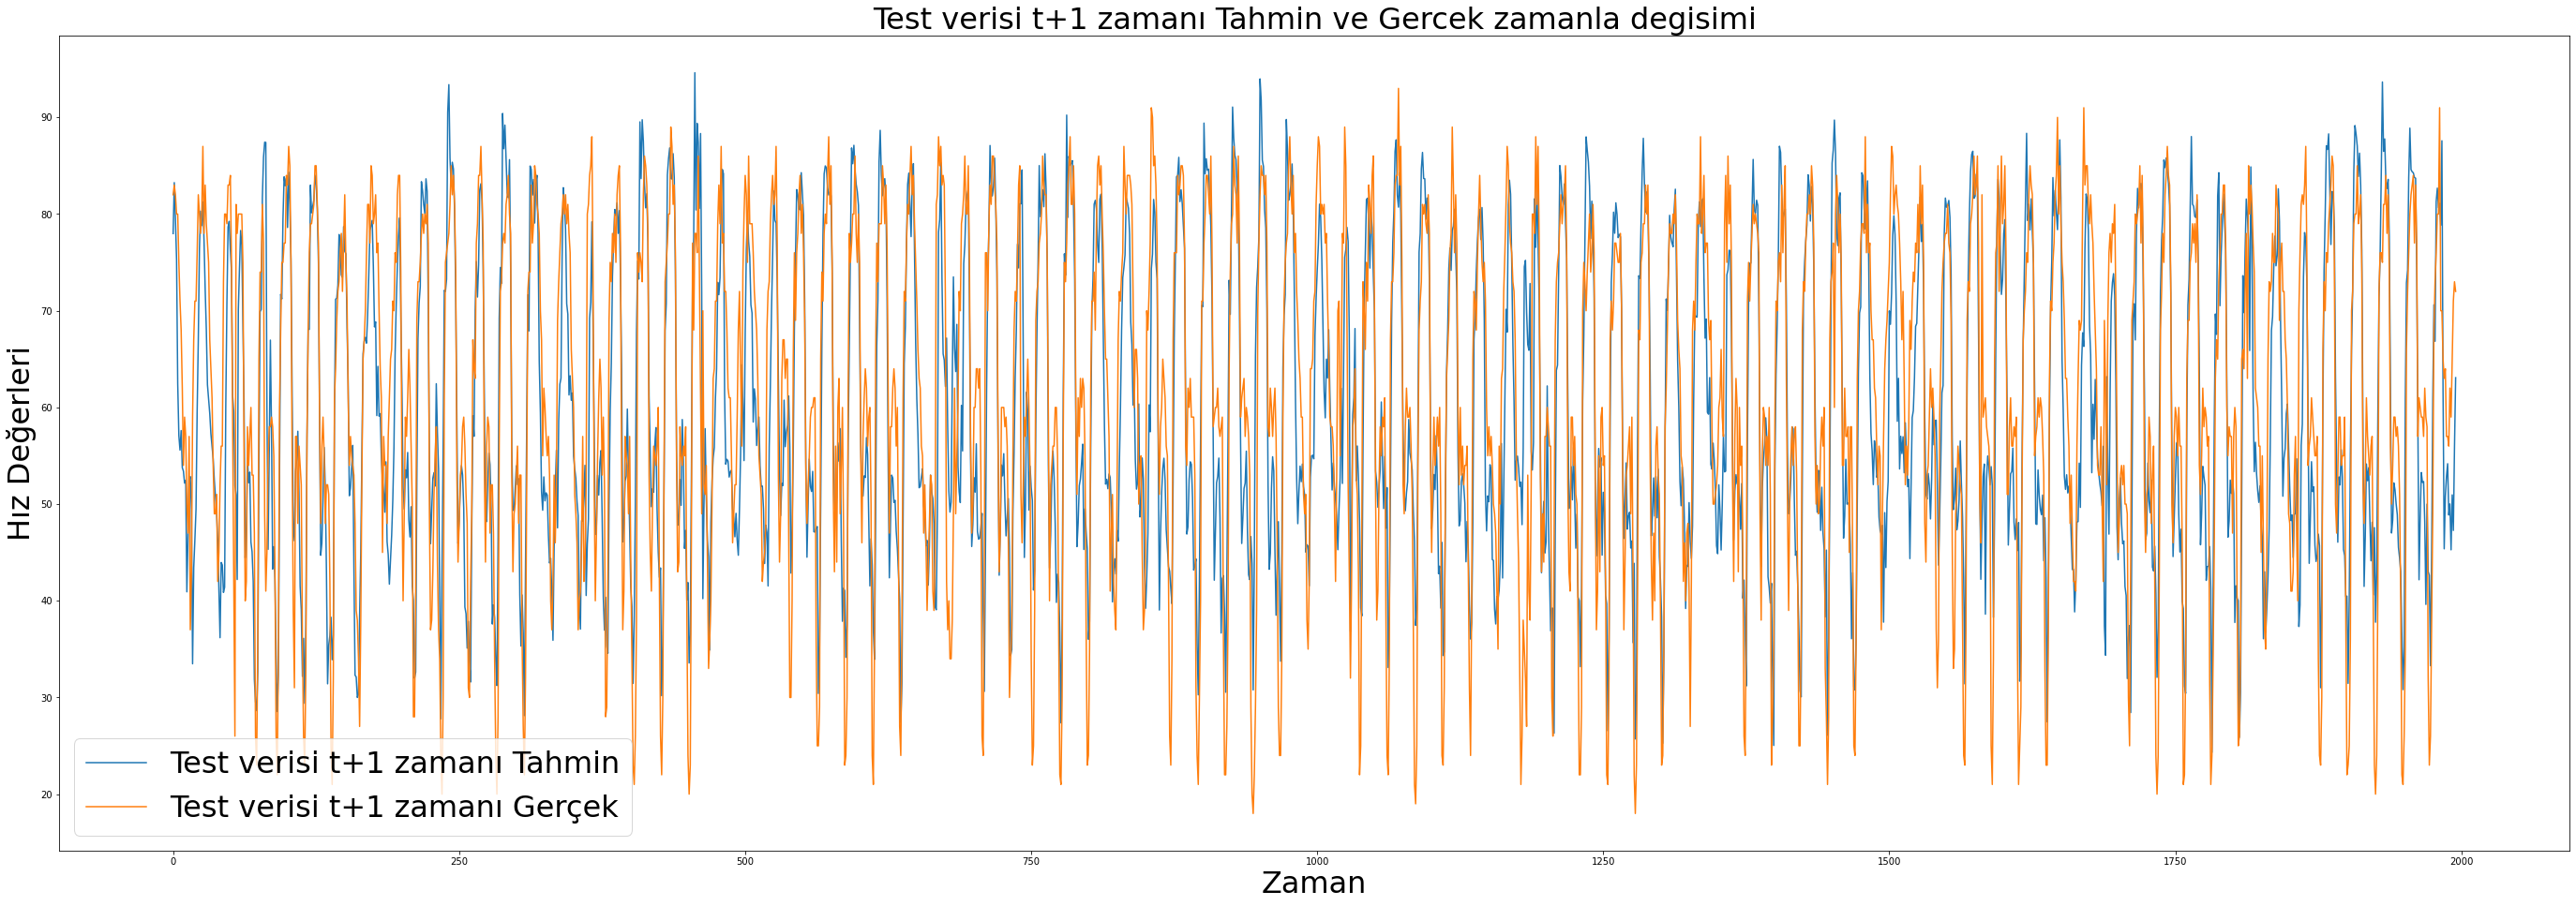

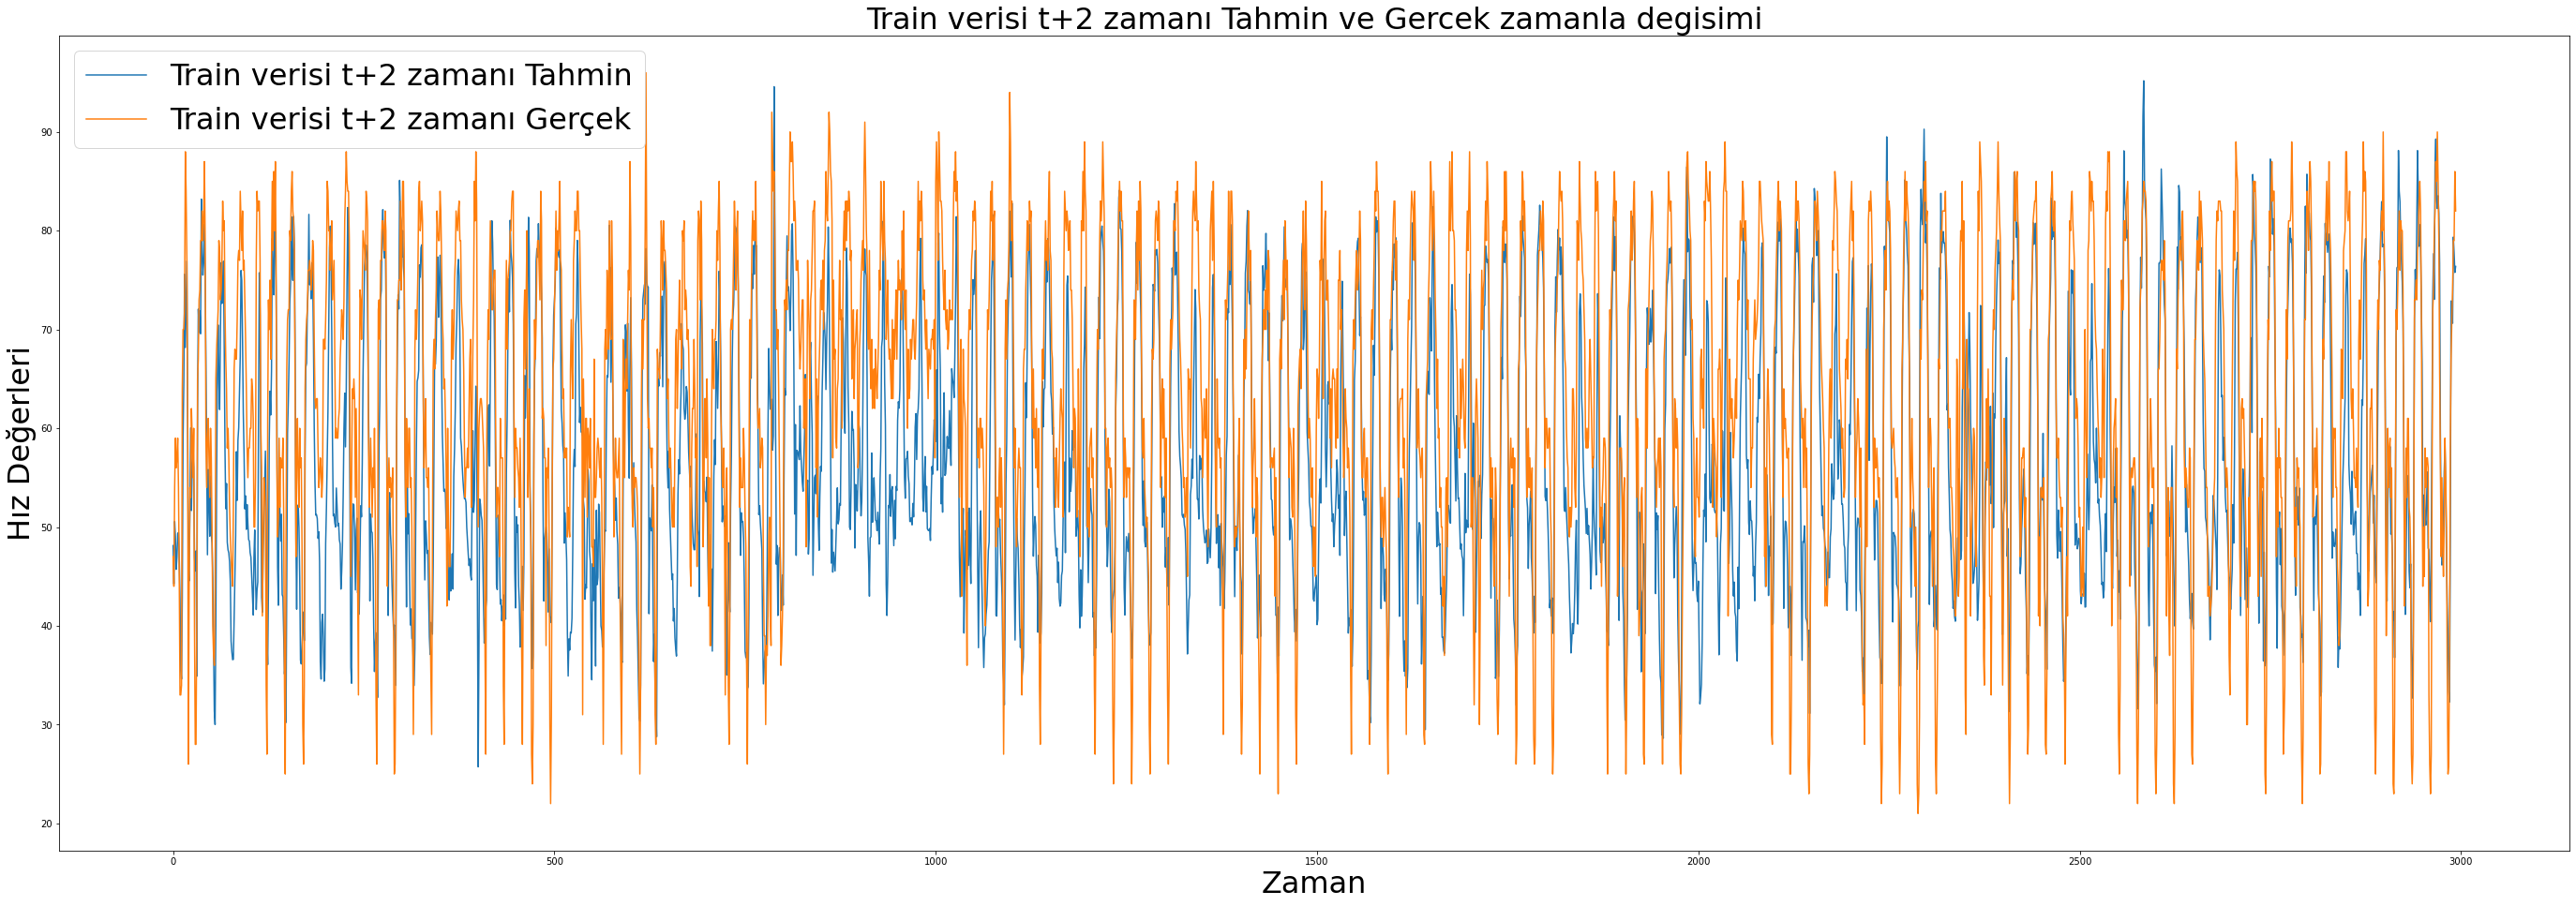

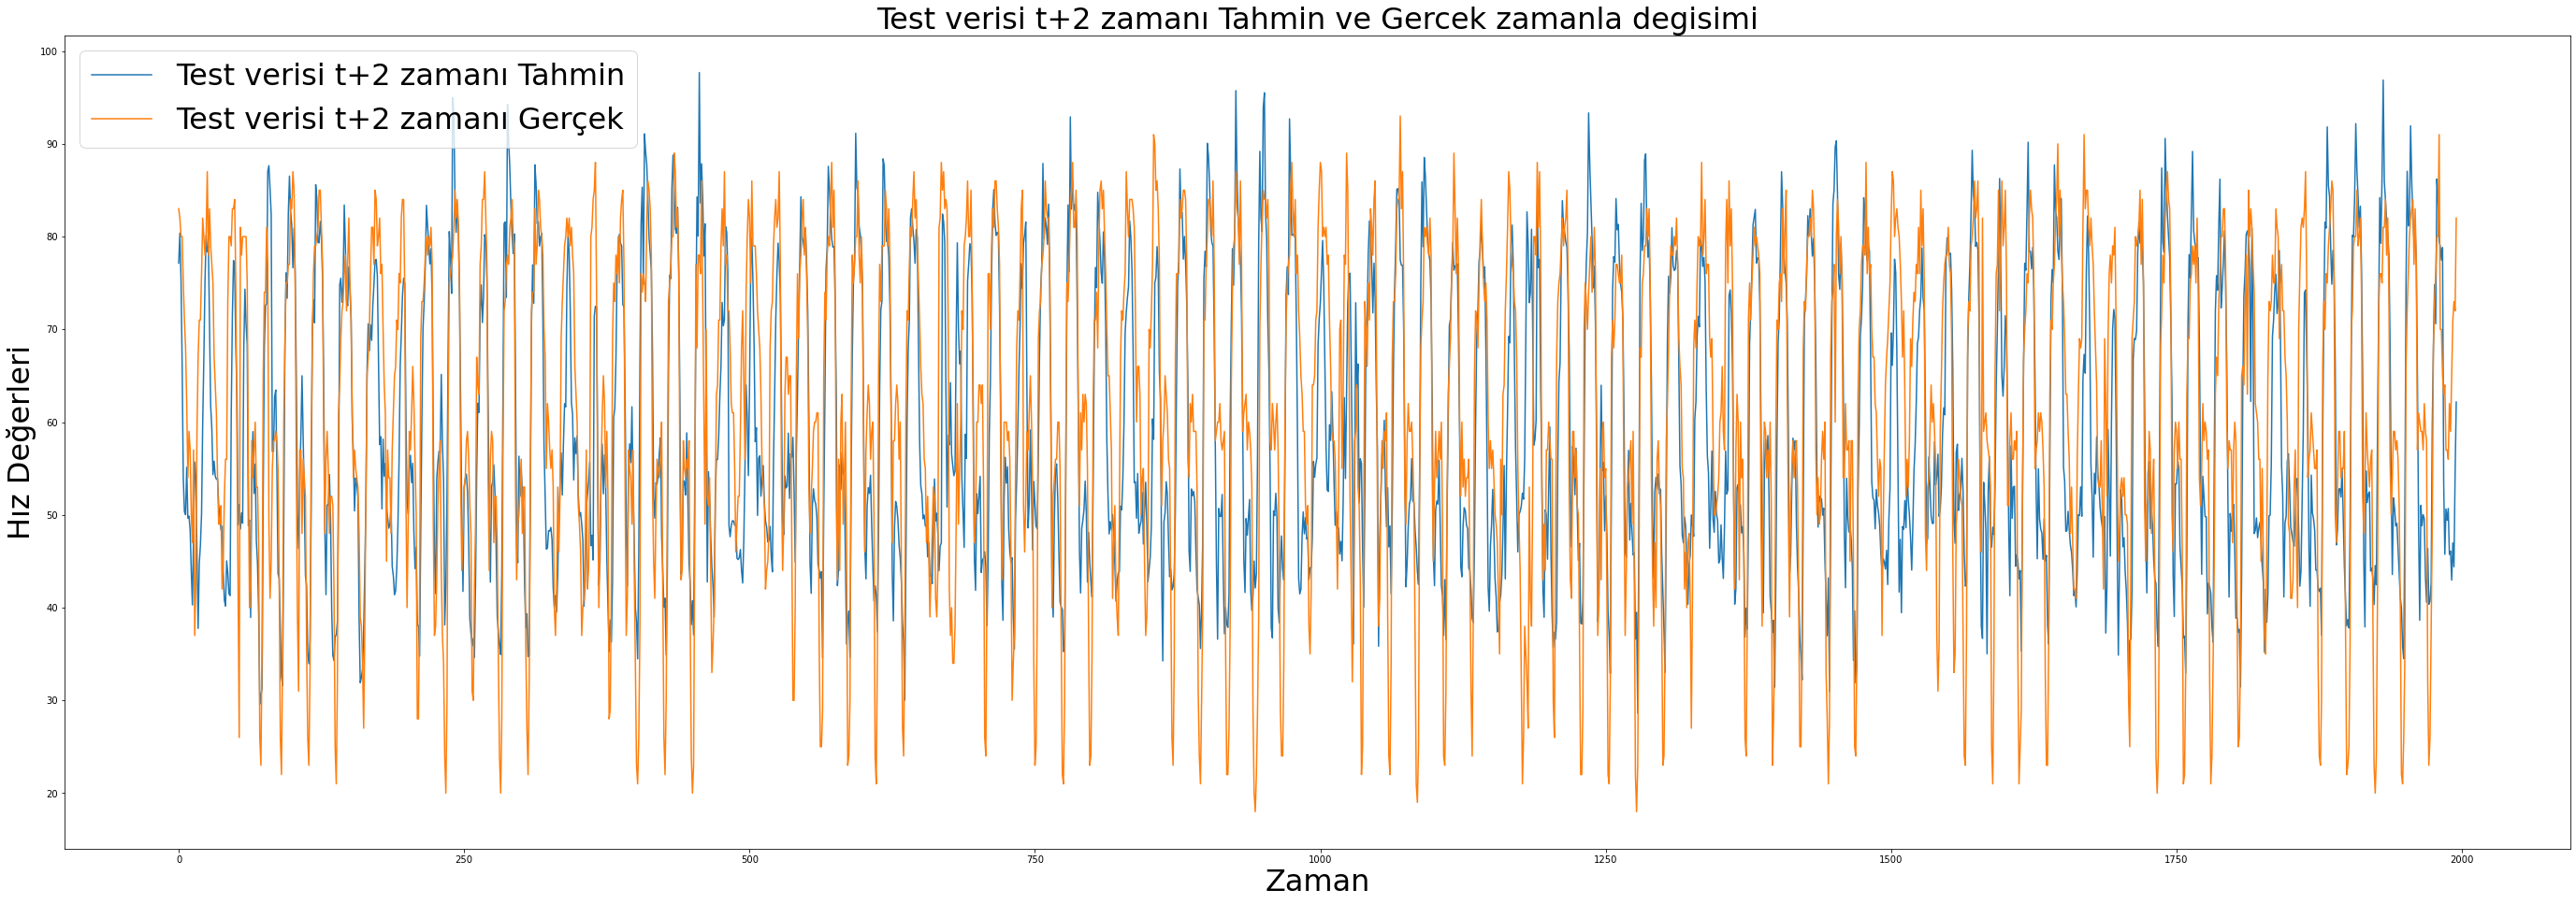

In [19]:
train_y1=train_y[:,0]
pred_train_y1=pred_train_y[:,0]
plt.figure(figsize=(48, 16))
plt.plot(pred_train_y1, label = "Train verisi t zamanı Tahmin")
plt.plot(train_y1, label = "Train verisi t zamanı Gerçek")
plt.title('Train verisi t zamanı Tahmin ve Gercek zamanla degisimi', fontsize=32)
plt.xlabel('Zaman', fontsize=32)
plt.ylabel('Hız Değerleri', fontsize=32)
plt.legend(fontsize=32)
#plt.show()
plt.savefig('MLP_Mnas_15k_iter.png')

test_y1=test_y[:,0]
pred_test_y1=pred_test_y[:,0]
plt.figure(figsize=(48, 16))
plt.plot(pred_test_y1, label = "Test verisi t zamanı Tahmin")
plt.plot(test_y1, label = "Test verisi t zamanı Gerçek")
plt.title('Test verisi t zamanı Tahmin ve Gercek zamanla degisimi', fontsize=32)
plt.xlabel('Zaman', fontsize=32)
plt.ylabel('Hız Değerleri', fontsize=32)
plt.legend(fontsize=32)
#plt.show()
plt.savefig('MLP_Mnas_15k_iter.png')

train_y2=train_y[:,1]
pred_train_y2=pred_train_y[:,1]
plt.figure(figsize=(48, 16))
plt.plot(pred_train_y2, label = "Train verisi t+1 zamanı Tahmin")
plt.plot(train_y2, label = "Train verisi t+1 zamanı Gerçek")
plt.title('Train verisi t+1 zamanı Tahmin ve Gercek zamanla degisimi', fontsize=32)
plt.xlabel('Zaman', fontsize=32)
plt.ylabel('Hız Değerleri', fontsize=32)
plt.legend(fontsize=32)
#plt.show()
plt.savefig('MLP_Mnas_15k_iter.png')


test_y2=test_y[:,1]
pred_test_y2=pred_test_y[:,1]
plt.figure(figsize=(48, 16))
plt.plot(pred_test_y2, label = "Test verisi t+1 zamanı Tahmin")
plt.plot(test_y2, label = "Test verisi t+1 zamanı Gerçek")
plt.title('Test verisi t+1 zamanı Tahmin ve Gercek zamanla degisimi', fontsize=32)
plt.xlabel('Zaman', fontsize=32)
plt.ylabel('Hız Değerleri', fontsize=32)
plt.legend(fontsize=32)
#plt.show()
plt.savefig('MLP_Mnas_15k_iter.png')

train_y3=train_y[:,2]
pred_train_y3=pred_train_y[:,2]
plt.figure(figsize=(48, 16))
plt.plot(pred_train_y3, label = "Train verisi t+2 zamanı Tahmin")
plt.plot(train_y3, label = "Train verisi t+2 zamanı Gerçek")
plt.title('Train verisi t+2 zamanı Tahmin ve Gercek zamanla degisimi', fontsize=32)
plt.xlabel('Zaman', fontsize=32)
plt.ylabel('Hız Değerleri', fontsize=32)
plt.legend(fontsize=32)
#plt.show()
plt.savefig('MLP_Mnas_15k_iter.png')


test_y3=test_y[:,2]
pred_test_y3=pred_test_y[:,2]
plt.figure(figsize=(48, 16))
plt.plot(pred_test_y3, label = "Test verisi t+2 zamanı Tahmin")
plt.plot(test_y3, label = "Test verisi t+2 zamanı Gerçek")
plt.title('Test verisi t+2 zamanı Tahmin ve Gercek zamanla degisimi', fontsize=32)
plt.xlabel('Zaman', fontsize=32)
plt.ylabel('Hız Değerleri', fontsize=32)
plt.legend(fontsize=32)
#plt.show()
plt.savefig('MLP_Mnas_15k_iter.png')

In [20]:
for m in range (1,n_steps):

 train_y%d=train_y[:,0+%d-1]
 pred_train_y%d=pred_train_y[:,0+%d-1]
 plt.figure(figsize=(48, 16))
 plt.plot(pred_train_y%d, label = "Train verisi t+%d zamanı Tahmin")
 plt.plot(train_y%d, label = "Train verisi t+%d zamanı Gerçek")
 plt.title('Train verisi t+%d zamanı Tahmin ve Gercek zamanla degisimi', fontsize=32)
 plt.xlabel('Zaman', fontsize=32)
 plt.ylabel('Hız Değerleri', fontsize=32)
 plt.legend(fontsize=32)
 #plt.show()
 plt.savefig('MLP_Mnas_%d_train.png')

 test_y%d=test_y[:,0+%d-1]
 pred_test_y%d=pred_test_y[:,0+%d-1]
 plt.figure(figsize=(48, 16))
 plt.plot(pred_test_y%d, label = "Test verisi t+%d zamanı Tahmin")
 plt.plot(test_y%d, label = "Test verisi t+%d zamanı Gerçek")
 plt.title('Test verisi t+%d zamanı Tahmin ve Gercek zamanla degisimi', fontsize=32)
 plt.xlabel('Zaman', fontsize=32)
 plt.ylabel('Hız Değerleri', fontsize=32)
 plt.legend(fontsize=32)
 #plt.show()
 plt.savefig('MLP_Mnas_%d_test.png')

SyntaxError: invalid syntax (<ipython-input-20-bf4f69dd1c3b>, line 3)